In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score

C:\ProgramData\Anaconda3\envs\xgboost\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
data = pd.read_csv('../data/train_clean.csv')

In [3]:
data.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,no_response,no_response,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,no_response,no_response,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [4]:
data.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1                object
doctor_recc_seasonal            object
chronic_med_condition           object
child_under_6_months           float64
health_worker                   object
health_insurance                object
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [5]:
categorical_columns = list(data.select_dtypes('object').columns)
categorical_columns

['doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'health_worker',
 'health_insurance',
 'age_group',
 'education',
 'race',
 'sex',
 'income_poverty',
 'marital_status',
 'rent_or_own',
 'employment_status',
 'hhs_geo_region',
 'census_msa',
 'employment_industry',
 'employment_occupation']

In [6]:
X = data.drop(columns=['h1n1_vaccine', 'seasonal_vaccine'])
y = data['seasonal_vaccine']

In [7]:
Xd = pd.get_dummies(data=X, columns=categorical_columns, drop_first=True)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(Xd, y, random_state=42, stratify=y)

In [9]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [10]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [11]:
xg_cls = xgb.XGBClassifier(random_state=42, use_label_encoder=False)

params = {
    'n_estimators' : [100, 250, 500],
    'max_depth' : [3, 5, 6, 10],
    'learning_rate' : [0.01, 0.1, 0.3],
    'colsample_bytree' : [0.5, 1],
    'subsample' : [0.6, 1] 
}

gs = GridSearchCV(estimator=xg_cls, param_grid=params, scoring='precision')

gs.fit(X_train, y_train)

y_pred = gs.predict(X_test)

[16:31:31] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:31:32] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:31:33] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:31:34] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

In [12]:
gs.best_score_

0.7833679434373227

In [13]:
gs.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [14]:
gs.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 100,
 'subsample': 1}

In [15]:
accuracy_score(y_test, y_pred), accuracy_score(y_train, gs.predict(X_train))

(0.7790924067695073, 0.7931103344982526)

In [16]:
precision_score(y_test, y_pred), precision_score(y_train, gs.predict(X_train))

(0.7803706245710363, 0.7926360966794669)

In [17]:
recall_score(y_test, y_pred), recall_score(y_train, gs.predict(X_train))

(0.7314248954647796, 0.7525198370147973)

In [18]:
roc_auc_score(y_test, y_pred), roc_auc_score(y_train, gs.predict(X_train))

(0.7760263490776813, 0.7904975866688336)

**Just model**

In [ ]:
xg_cls = xgb.XGBClassifier(random_state=42,
                           use_label_encoder=False,
                           max_depth=8,
                           colsample_bytree = 0.7,
                           subsample=0.7,
                           learning_rate=0.005,
                           n_estimators=1000,
                           reg_lambda=5
                            )

xg_cls.fit(X_train, y_train)

y_pred = xg_cls.predict(X_test)

In [104]:
accuracy_score(y_test, y_pred), accuracy_score(y_train, xg_cls.predict(X_train))

(0.7831361389845739, 0.836445332001997)

In [105]:
precision_score(y_test, y_pred), precision_score(y_train, xg_cls.predict(X_train))

(0.7833503923575571, 0.83440194561132)

In [106]:
recall_score(y_test, y_pred), recall_score(y_train, xg_cls.predict(X_train))

(0.7385011257639112, 0.8093502037315033)

In [107]:
roc_auc_score(y_test, y_pred), roc_auc_score(y_train, xg_cls.predict(X_train))

(0.7802651368729869, 0.8347012603111927)

Drop some features and see if that helps


#### Switch classes from original and do some feature engineering
Such as make a new feature that is 1 if the subject had both h1n1_concern and h1n1_knowledge, another one for all the behaviors and a third one for doctor recommended

In [7]:
data = pd.read_csv('../data/train_clean.csv')

In [8]:
data['h1n1_vaccine'].value_counts()

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

In [9]:
data['seasonal_vaccine'].value_counts()

0    14272
1    12435
Name: seasonal_vaccine, dtype: int64

In [10]:
# since we're interested in the people who did not get vaccinated: switch 0 and 1 labels
data['h1n1_vaccine'].replace({1:0, 0:1}, inplace=True)
data['h1n1_vaccine'].value_counts()

data['seasonal_vaccine'].replace({1:0, 0:1}, inplace=True)
data['seasonal_vaccine'].value_counts()

1    14272
0    12435
Name: seasonal_vaccine, dtype: int64

In [11]:
# make a new feature h1n1_all for participants who had both h1n1_concern and h1n1_knowledge
data['h1n1_all'] = data['h1n1_concern'] * data['h1n1_knowledge']

In [12]:
list(data.columns)

['respondent_id',
 'h1n1_concern',
 'h1n1_knowledge',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'health_insurance',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'age_group',
 'education',
 'race',
 'sex',
 'income_poverty',
 'marital_status',
 'rent_or_own',
 'employment_status',
 'hhs_geo_region',
 'census_msa',
 'household_adults',
 'household_children',
 'employment_industry',
 'employment_occupation',
 'h1n1_vaccine',
 'seasonal_vaccine',
 'h1n1_all']

In [13]:
# make a new feature h1n1_all for participants who responded yes to all the behavior questions
behaviour_columns = [column for column in list(data.columns) if 'behavioral' in column]

In [14]:
data['behavioral_all'] = 1

for column in behaviour_columns:
    data['behavioral_all'] = data['behavioral_all'] * data[column]


In [15]:
# make a new feature opinion_all for participants based on their opinion scores to the opinion questions
opinion_columns = [column for column in list(data.columns) if 'opinion' in column]

data['opinion_all'] = 1

for column in opinion_columns:
    data['opinion_all'] = data['opinion_all'] * data[column]

In [16]:
data.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine', 'h1n1_all',
       'behavioral_all', 'opinion_all'],
      dtype='object')

In [58]:
X = data.drop(columns=['seasonal_vaccine'])
y = data['seasonal_vaccine']

In [59]:
Xd = pd.get_dummies(data=X, columns=categorical_columns, drop_first=True)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(Xd, y, random_state=42, stratify=y)

In [61]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [62]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [71]:
# gridsearch
xg_cls = xgb.XGBClassifier(random_state=42, use_label_encoder=False)

params = {
    'n_estimators' : [100, 250, 500],
    'max_depth' : [3, 5, 6, 10],
    'learning_rate' : [0.01, 0.1, 0.3],
    'colsample_bytree' : [0.5, 1],
    'subsample' : [0.6, 1] 
}

gs = GridSearchCV(estimator=xg_cls, param_grid=params, scoring='roc_auc')

gs.fit(X_train, y_train)

y_pred = gs.predict(X_test)

[18:37:50] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:37:50] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:37:51] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:37:51] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

In [109]:
gs.best_score_

0.8623440999692423

In [110]:
gs.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=16, num_parallel_tree=1,
              predictor='auto', random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.6, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [115]:
gs.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.01,
 'max_depth': 6,
 'n_estimators': 500,
 'subsample': 0.6}

In [19]:
test_pred = gs.predict(X_test)
train_pred = gs.predict(X_train)

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay

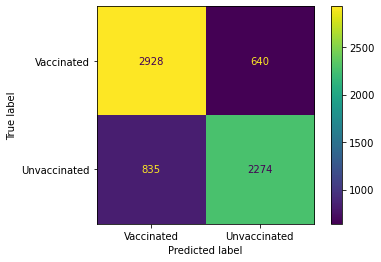

In [21]:
ConfusionMatrixDisplay.from_predictions(y_test, test_pred, display_labels=['Vaccinated', 'Unvaccinated'])

In [22]:
accuracy_score(y_test, test_pred), accuracy_score(y_train, train_pred)

(0.7790924067695073, 0.7931103344982526)

In [23]:
precision_score(y_test, test_pred)

0.7803706245710363

In [24]:
recall_score(y_test, test_pred)

0.7314248954647796

In [25]:
roc_auc_score(y_test, test_pred)

0.7760263490776813

In [26]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, test_pred)

0.7760263490776813

In [27]:
X.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [63]:
model = xgb.XGBClassifier(random_state=42,
                          use_label_encoder=False,
                          colsample_bytree=0.5,
                          learning_rate=0.001,
                          max_depth=10,
                          n_estimators=500,
                          subsample=1
                         )
model.fit(X_train, y_train)


[18:36:38] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.001, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=16, num_parallel_tree=1,
              predictor='auto', random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [64]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

In [65]:
from sklearn.metrics import ConfusionMatrixDisplay

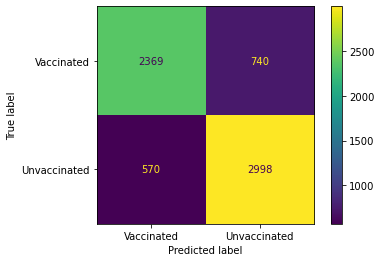

In [66]:
ConfusionMatrixDisplay.from_predictions(y_test, test_pred, display_labels=['Vaccinated', 'Unvaccinated'])

In [67]:
accuracy_score(y_test, test_pred), accuracy_score(y_train, train_pred)

(0.803804103639359, 0.8580629056415376)

In [68]:
precision_score(y_test, test_pred)

0.8020331728196897

In [69]:
recall_score(y_test, test_pred)

0.8402466367713004

In [70]:
roc_auc_score(y_test, test_pred)

0.8011139906275286